> From the PO.DAAC Cookbook, to access the GitHub version of the notebook, follow [this link](https://github.com/podaac/tutorials/blob/master/notebooks/GIS/SWOTsample_GISshapefiles.ipynb).

# SWOT Simulated North American Continent Hydrology Dataset

## Finding ways to visualize SWOT Simulated Shapefile Dataset

### Learning Objectives:
- Accessing SWOT shapefile hydrology dataset and visualizing it locally.
- Accessing & visualizing dataset through the use of Geopandas & Matplotlib.

This tutorial is looking to explore geospatial libraries and visualizing vector datasets without the use of a GIS desktop software. 

### Dataset:

SWOT_SIMULATED_NA_CONTINENT_L2_HR_RIVERSP_V1:

>DOI: [https://doi.org/10.5067/KARIN-2RSP1](https://doi.org/10.5067/KARIN-2RSP1)

This SWOT simulated river data includes shapefiles of River Nodes and River Reaches. Shapefiles of SWOT sample data can be downloaded [here](https://search.earthdata.nasa.gov/search/granules?p=C2263384307-POCLOUD&pg[0][v]=f&pg[0][gsk]=-start_date&q=SWOT%20simulated&tl=1666291003.129!3!!). The single file this notebook will perform most analysis on can be downloaded [here](https://search.earthdata.nasa.gov/projects?p=C2263384307-POCLOUD!C2263384307-POCLOUD&pg[1][a]=2295808672!POCLOUD&pg[1][v]=t&pg[1][gsk]=-start_date&pg[1][m]=download&q=SWOT%20simulated&tl=1666291003!3!!).

### Setting up Environments
- Prior to running the notebook, the environments must be set correctly. 
- This notebook can be ran using both Python 3.9 and 3.10 as long as the libraries are correctly installed.
- Utilizing Anaconda Navigator to create your enviroments. Accessing the Conda-Forge channel to install geopsatial libraries.
- GDAL and GeoPandas will direct and install majority of the libraries you will need, but some libraries will need to be installed by searching them individually.

### Libraries Needed

In [1]:
import os
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx

### Opening a Single Shapefile

Using Geopandas to open & read a single shapefile. (Change the path to your pre-downloaded shapefile)

In [2]:
River = gpd.read_file('C:\SWOT\SWOT_River_Reaches\SWOT_L2_HR_RiverSP_Reach_007_300_NA_20220814T210504_20220814T210907_PGA0_01.shp')
River

reach_id          time      time_tai             time_str      p_lat  \
0    74225000301  7.138265e+08  7.138265e+08  2022-08-14T21:0806Z  33.916062   
1    74225000311  7.138265e+08  7.138265e+08  2022-08-14T21:0806Z  33.906781   
2    74225000321  7.138265e+08  7.138265e+08  2022-08-14T21:0807Z  33.870673   
3    74225000331  7.138265e+08  7.138265e+08  2022-08-14T21:0807Z  33.851562   
4    74225000341  7.138265e+08  7.138265e+08  2022-08-14T21:0806Z  33.866701   
..           ...           ...           ...                  ...        ...   
480  75165000211 -1.000000e+12 -1.000000e+12              no_data  30.433862   
481  75165000221 -1.000000e+12 -1.000000e+12              no_data  30.479698   
482  75165000231 -1.000000e+12 -1.000000e+12              no_data  30.531514   
483  75165000241 -1.000000e+12 -1.000000e+12              no_data  30.560974   
484  75165000251 -1.000000e+12 -1.000000e+12              no_data  30.591646   

         p_lon river_name           wse         wse_u       wse_r_u  ...  \
0   -95.560044    no_data  3.495055e+01 -1.000000e+12  2.515300e-01  ...   
1   -95.654646    no_data  3.405308e+01 -1.000000e+12  5.495000e-02  ...   
2   -95.762974    no_data  3.364557e+01 -1.000000e+12  2.726000e-02  ...   
3   -95.845656    no_data  3.345162e+01 -1.000000e+12  3.449000e-02  ...   
4   -95.946894    no_data  3.316602e+01 -1.000000e+12  2.511000e-02  ...   
..         ...        ...           ...           ...           ...  ...   
480 -96.288294    no_data -1.000000e+12 -1.000000e+12 -1.000000e+12  ...   
481 -96.336497    no_data -1.000000e+12 -1.000000e+12 -1.000000e+12  ...   
482 -96.369330    no_data -1.000000e+12 -1.000000e+12 -1.000000e+12  ...   
483 -96.417506    no_data -1.000000e+12 -1.000000e+12 -1.000000e+12  ...   
484 -96.453558    no_data -1.000000e+12 -1.000000e+12 -1.000000e+12  ...   

     p_width    p_wid_var  p_n_nodes   p_dist_out      p_length         p_maf  \
0      156.0  3097.993819         54  1461998.230  10753.251601 -1.000000e+12   
1      175.0  3701.568090         79  1477859.906  15861.676389 -1.000000e+12   
2      183.0  3908.298409         68  1491552.334  13692.428266 -1.000000e+12   
3      148.0  3991.344178         61  1503740.939  12188.604492 -1.000000e+12   
4      175.0  4193.042490         61  1515895.262  12154.323029 -1.000000e+12   
..       ...          ...        ...          ...           ...           ...   
480     80.0   370.935908         53   418067.216  10666.156902 -1.000000e+12   
481     84.0   415.828931         53   428691.064  10623.847758 -1.000000e+12   
482     67.0   475.710190         65   441697.761  13006.697340 -1.000000e+12   
483     80.0   373.408224         49   451539.432   9841.670412 -1.000000e+12   
484     84.0   551.788513         49   461358.159   9818.727520 -1.000000e+12   

     p_dam_id  p_n_ch_max  p_n_ch_mod  \
0           0           2           1   
1           0           2           1   
2           0           4           1   
3           0           2           1   
4           0           3           1   
..        ...         ...         ...   
480         0           1           1   
481         0           2           1   
482         0           1           1   
483         0           1           1   
484         0           2           1   

                                              geometry  
0    LINESTRING (-95.53934 33.88031, -95.53966 33.8...  
1    LINESTRING (-95.59665 33.94170, -95.59665 33.9...  
2    LINESTRING (-95.72430 33.89448, -95.72463 33.8...  
3    LINESTRING (-95.80786 33.86129, -95.80818 33.8...  
4    LINESTRING (-95.89671 33.87151, -95.89704 33.8...  
..                                                 ...  
480  LINESTRING (-96.27241 30.40543, -96.27215 30.4...  
481  LINESTRING (-96.31719 30.45052, -96.31751 30.4...  
482  LINESTRING (-96.35467 30.51265, -96.35491 30.5...  
483  LINESTRING (-96.39119 30.53292, -96.39150 30.5...  
484  LINESTRING (-96.42988 30.58532, -96.

### Converting a Shapefile

If you want a more in depth view of the datasets attributes you can convert it to a CSV. 

Also if you would like to open up the dataset as a GeoJSON, Geopandas can help transform the dataset. 

In [3]:
River.to_csv("C:\SWOT\SWOT_Attributes.csv")

In [4]:
River.to_file("C:\SWOT\SWOT.json", driver='GeoJSON')

### Plotting a Shapefile

Using Matplotlib to plot the shapefiles, then adding a basemap for context using the library Contextily.

Contextily offers a list of basemap providers that can be easily visualized.

https://contextily.readthedocs.io/en/latest/intro_guide.html

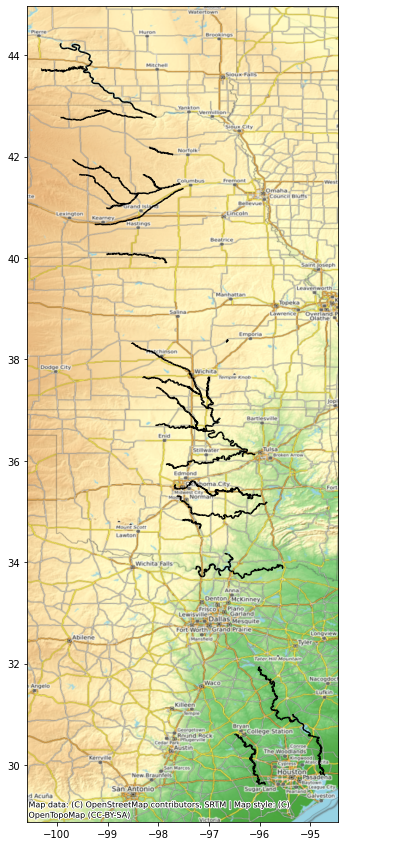

In [5]:
fig, ax = plt.subplots(figsize=(25,15))
River.plot(ax=ax, color='black')
cx.add_basemap(ax, crs=River.crs, source=cx.providers.OpenTopoMap)

### Shapefile Attribute Visualization

Shapefiles have various attributes or variables with each column signifiying individual data values.

Previously we plotted by showcasing all the river reaches of that shapefile on the map. 

You can also plot a shapefile based on a specific variable.

Within Matplotlib you can specifiy the column parameter based on the column within the data's attributes.

For the example below, we will look at the column 'wse' which stands for water surface elevation.

In [6]:
#First, we set all -999999999999 values to nan so that the color variation shows for the simulated values
River["wse"] = River.wse.apply(lambda x: x if x > -10 else np.nan)

<AxesSubplot:>

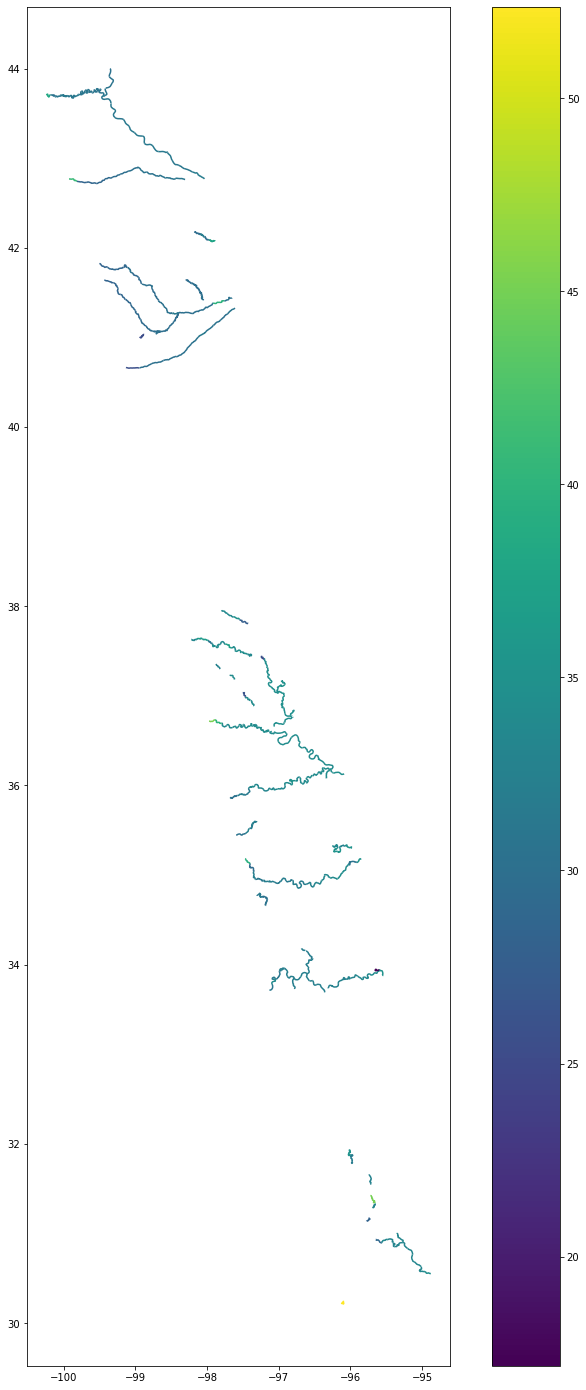

In [7]:
fig, ax = plt.subplots(figsize=(15,25))
River.plot(column='wse', ax=ax, legend=True, cmap='viridis')

### You can also specifiy which row of attributes you would like to plot using Pandas '.loc' or '.iloc'.

<AxesSubplot:>

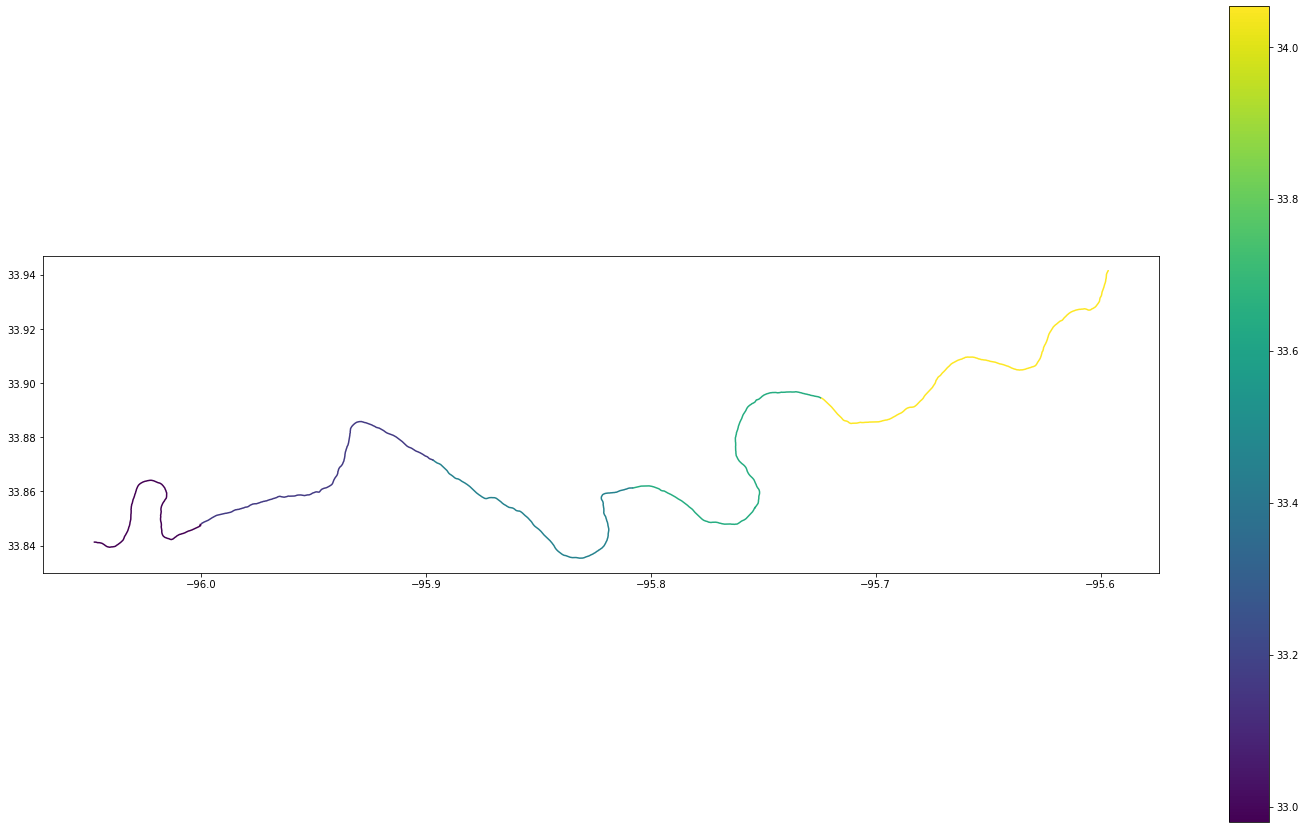

In [9]:
fig, ax = plt.subplots(figsize=(25,15))
River.loc[1:5].plot(column='wse',ax=ax, legend=True)

### Querying a Shapefile

If you want to search for a specific reach id or a specific length of river reach that is possible through a spatial query using Geopandas. 

Utilizing comparison operators (>, <, ==, >=, <=).

You can zoom into a particular river reach by specifying it’s row of attributes. Here we specify reach id# '75165000221' which is a section of the Brazos River in Texas.

In [10]:
Query = River.query("reach_id == '75165000221'")
Query

reach_id          time      time_tai time_str      p_lat      p_lon  \
481  75165000221 -1.000000e+12 -1.000000e+12  no_data  30.479698 -96.336497   

    river_name  wse         wse_u       wse_r_u  ...  p_width   p_wid_var  \
481    no_data  NaN -1.000000e+12 -1.000000e+12  ...     84.0  415.828931   

     p_n_nodes  p_dist_out      p_length         p_maf  p_dam_id  p_n_ch_max  \
481         53  428691.064  10623.847758 -1.000000e+12         0           2   

     p_n_ch_mod                                           geometry  
481           1  LINESTRING (-96.31719 30.45052, -96.31751 30.4...  

[1 rows x 111 columns]

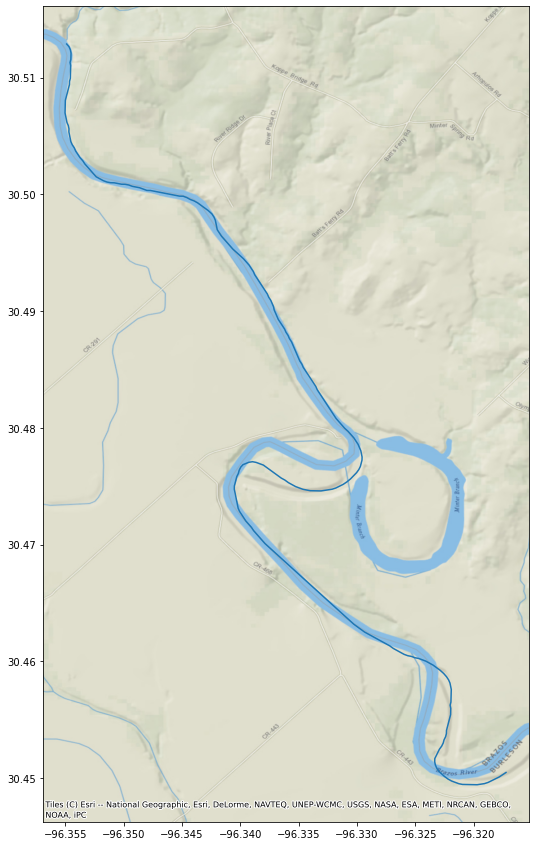

In [11]:
fig, ax = plt.subplots(figsize=(25,15))
Query.plot(ax=ax, legend=True)
cx.add_basemap(ax, crs=River.crs, source=cx.providers.Esri.NatGeoWorldMap)

### You can specify river reaches that have a water surface elevation greater than 35 meters.

In [12]:
WSE = River.query('wse > 35')
WSE

reach_id          time      time_tai             time_str      p_lat  \
47   74242200111  7.138265e+08  7.138264e+08  2022-08-14T21:0741Z  35.317087   
49   74242200131  7.138265e+08  7.138264e+08  2022-08-14T21:0741Z  35.272401   
50   74242200141  7.138265e+08  7.138264e+08  2022-08-14T21:0741Z  35.275389   
81   74242300041  7.138265e+08  7.138264e+08  2022-08-14T21:0744Z  35.164566   
102  74242300251  7.138265e+08  7.138264e+08  2022-08-14T21:0740Z  35.153209   
124  74248100191  7.138264e+08  7.138264e+08  2022-08-14T21:0727Z  36.047936   
165  74249200121  7.138264e+08  7.138264e+08  2022-08-14T21:0712Z  36.707171   
166  74249200131  7.138264e+08  7.138264e+08  2022-08-14T21:0712Z  36.719942   
210  74249300261  7.138264e+08  7.138264e+08  2022-08-14T21:0658Z  37.559008   
215  74249300311  7.138264e+08  7.138264e+08  2022-08-14T21:0656Z  37.627488   
216  74249300321  7.138264e+08  7.138264e+08  2022-08-14T21:0656Z  37.638600   
242  74249300801  7.138264e+08  7.138264e+08  2022-08-14T21:0708Z  37.113844   
269  74294200271  7.138263e+08  7.138263e+08  2022-08-14T21:0541Z  42.078318   
275  74294400061  7.138264e+08  7.138263e+08  2022-08-14T21:0553Z  41.392167   
349  74295600201  7.138263e+08  7.138263e+08  2022-08-14T21:0524Z  42.760592   
386  74295800141  7.138263e+08  7.138263e+08  2022-08-14T21:0507Z  43.699405   
441  75140100401  7.138265e+08  7.138265e+08  2022-08-14T21:0849Z  31.378090   
455  75140300011  7.138265e+08  7.138265e+08  2022-08-14T21:0839Z  31.899540   
473  75165000141  7.138265e+08  7.138265e+08  2022-08-14T21:0907Z  30.226423   

          p_lon river_name       wse         wse_u   wse_r_u  ...  p_width  \
47   -96.025428    no_data  35.15211 -1.000000e+12   0.37004  ...     75.0   
49   -96.149649    no_data  35.44462 -1.000000e+12   0.55727  ...     80.0   
50   -96.208073    no_data  35.21224 -1.000000e+12   0.16871  ...     80.0   
81   -95.879457    no_data  35.37206 -1.000000e+12   0.62036  ...    107.0   
102  -97.436113    no_data  39.51928 -1.000000e+12   1.35283  ...    108.0   
124  -96.814971    no_data  35.15695 -1.000000e+12   0.06185  ...    148.5   
165  -97.847587    no_data  39.86618 -1.000000e+12   0.06973  ...    123.0   
166  -97.930131    no_data  45.34975 -1.000000e+12   7.46494  ...    124.0   
210  -97.698991    no_data  37.31830 -1.000000e+12   0.00428  ...     92.0   
215  -98.028303    no_data  36.33513 -1.000000e+12   2.16842  ...     63.0   
216  -98.106747    no_data  36.09641 -1.000000e+12   0.11889  ...     63.0   
242  -96.957548    no_data  35.05791 -1.000000e+12   0.06902  ...     63.0   
269  -97.931605    no_data  37.77142 -1.000000e+12   1.41024  ...     51.0   
275  -97.835479    no_data  39.74193 -1.000000e+12   0.00000  ...    152.0   
349  -99.870893    no_data  40.82342 -1.000000e+12   2.88420  ...    228.0   
386 -100.216124    no_data  38.30095 -1.000000e+12  10.35277  ...    127.0   
441  -95.684602    no_data  44.96841 -1.000000e+12   0.00208  ...     80.0   
455  -96.012439    no_data  35.29524 -1.000000e+12   0.00000  ...     67.0   
473  -96.104246    no_data  52.37545 -1.000000e+12   5.08629  ...     92.0   

       p_wid_var  p_n_nodes   p_dist_out      p_length         p_maf  \
47   2698.101164         66  1825209.708  13152.428425 -1.000000e+12   
49    571.014323         46  1843850.674   9289.513641 -1.000000e+12   
50    402.586845         68  1857401.869  13551.195121 -1.000000e+12   
81   1305.874486         42  1793769.436   8357.799096 -1.000000e+12   
102   829.919971         51  2029738.323  10121.780860 -1.000000e+12   
124   985.453315         78  2054425.795  15640.389075 -1.000000e+12   
165   832.564957         57  2166118.950  11377.423667 -1.000000e+12   
166  1741.611817         42  2174504.465   8385.514839 -1.000000e+12   
210  1200.772490         51  2303196.062  10149.015676 -1.000000e+12   
215   233.823669         42  2349425.456   8384.876289 -1.000000e+12   
216   631.220135         44  2358152.710   8727.253685

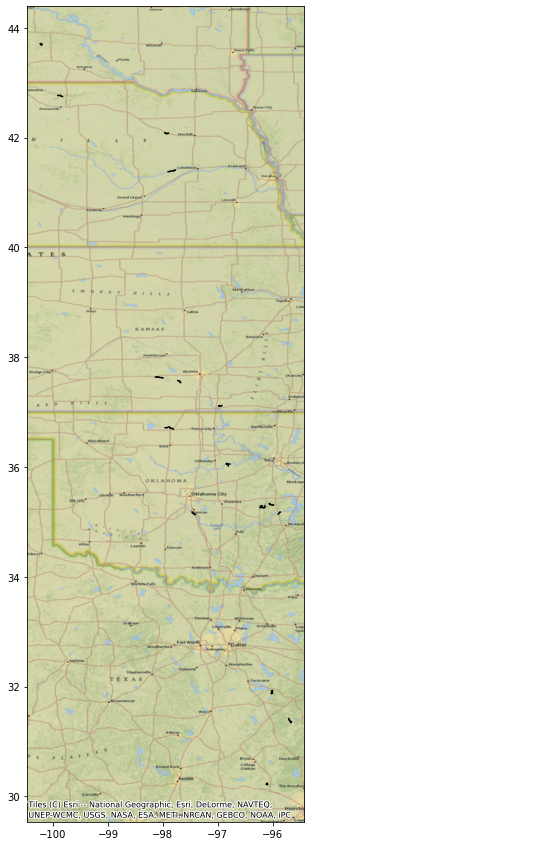

In [13]:
fig, ax = plt.subplots(figsize=(25,15))
WSE.plot(ax=ax, color='black')
cx.add_basemap(ax, crs=River.crs, source=cx.providers.Esri.NatGeoWorldMap)

## Bonus

Opening a folder with multiple shapefiles

- If you have multiple River Reaches or Nodes in a folder, it is possible to visualize all on one map.
- Utilizing both Glob and Pathlib libraries to read the folder, then using Pandas concat to merge the reaches to its own variable.
- Matplotlib Basemap offers the customization ability to create your own basemap.

https://matplotlib.org/basemap/users/geography.html

In [14]:
import glob
from pathlib import Path
import pandas as pd

# Direct folder path of shapefiles
folder = Path("C:\\SWOT\\SWOT_River_Reaches")

# State filename extension to look for within the folder, in this case .shp which is the shapefile
shapefiles = folder.glob("*.shp")

# Merge/Combine multiple shapefiles in folder into one
gdf = pd.concat([
    gpd.read_file(shp)
    for shp in shapefiles
]).pipe(gpd.GeoDataFrame)

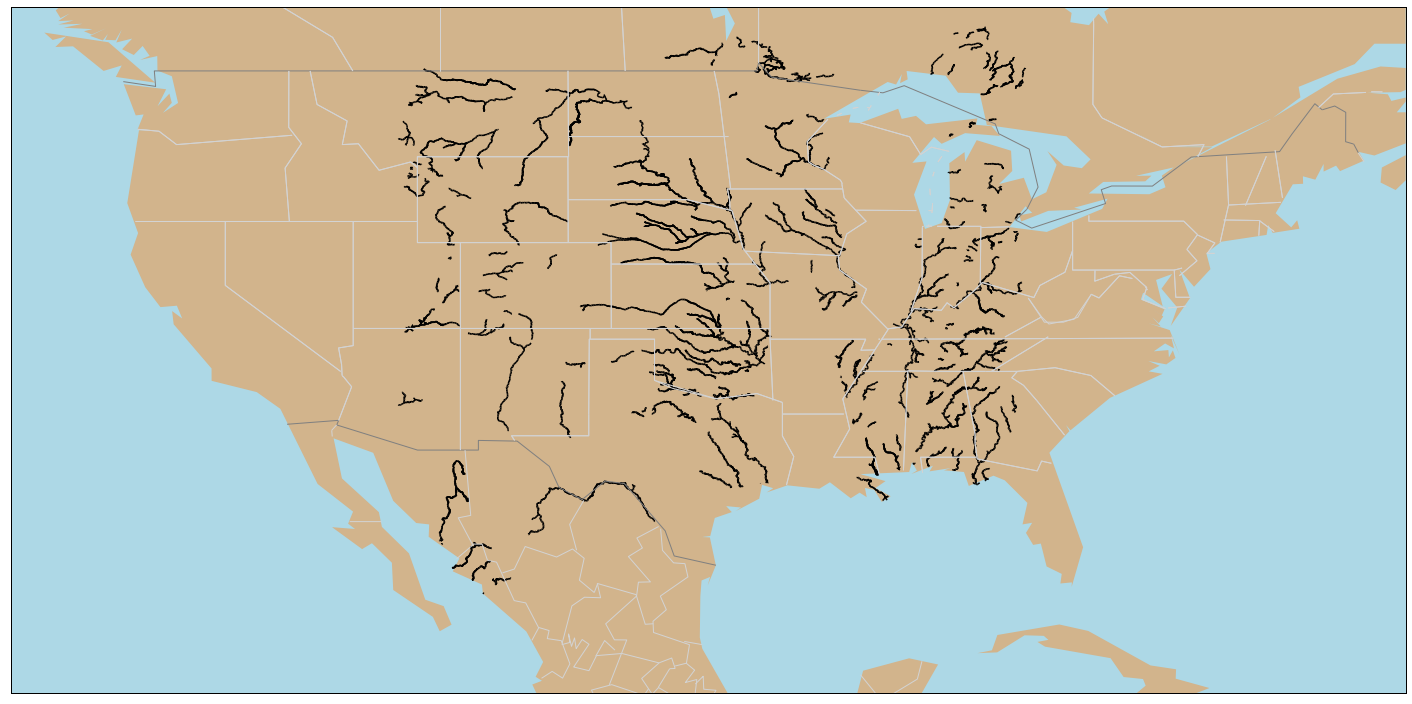

In [15]:
from mpl_toolkits.basemap import Basemap 

fig, ax = plt.subplots(figsize=(25,15))
gdf.plot(ax=ax, legend=True, color = 'black')
map = Basemap(llcrnrlon=-130, llcrnrlat=20, urcrnrlon=-65.,urcrnrlat=52., lat_0 = 40., lon_0 = -80)
map.drawmapboundary(fill_color='lightblue', color="black")
map.fillcontinents(color='tan',lake_color='lightblue')
map.drawcountries(color='grey', linewidth=1)
map.drawstates(color='lightgrey', linewidth=1)

## Next Steps

- This notebook has helped showcase how to visualize shapefile data without the use of a GIS desktop software.
- Showcasing different ways of plotting based on variables and adding context to the map. 
- Local visualization was the first step, but the next goal is to move towards utilizing the cloud.